<a href="https://colab.research.google.com/github/Re-taro/homework/blob/main/homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import ellipe

class Ellipse:
    # 円周率の近似値をクラス変数として定義
    pi = np.pi

    # インスタンス変数の定義
    def __init__(self, a, b, center=(0,0), n=129):
        self.major_radius = a  # 長軸半径
        self.minor_radius = b  # 短軸半径
        self.center = center  # 中心点の座標
        self.f_distance = np.sqrt(a**2 - b**2)  # 原点から焦点までの距離
        
        # 右側焦点の座標と左側焦点の座標
        self.focus_1 = (self.center[0] + self.f_distance, self.center[1])
        self.focus_2 = (self.focus_1[0] - 2 * self.f_distance, self.center[1])
        
        self.eccentricity = self.f_distance / a  # 離心率
        self.area =self.pi * self.major_radius * self.minor_radius  # 面積
        self.perimeter = 4 * ellipe(self.eccentricity)  # 周の長さ
        
        t = np.linspace(0, 2*np.pi, n)
        self.x = self.center[0] + self.major_radius * np.cos(t)
        self.y = self.center[1] + self.minor_radius * np.sin(t)

    # 回転メソッド
    # angleで回転角度(ラジアン)を指定
    # r_axisで回転軸の座標を指定
    def rotate(self, angle, r_axis):

        # 回転行列
        R = np.array([[np.cos(angle), -np.sin(angle)],
                      [np.sin(angle),  np.cos(angle)]])

        # 焦点の回転
        p = np.array(r_axis)
        self.focus_1 = np.dot(R, self.focus_1 - p) + p
        self.focus_2 = np.dot(R, self.focus_2 - p) + p

        # 楕円の回転
        q = np.array([[r_axis[0]],[r_axis[1]]])
        arr = np.vstack((self.x, self.y))
        arr_2 = np.dot(R, arr - q) + q
        self.x = arr_2[0]
        self.y = arr_2[1]

    # データ一覧表示メソッド
    def show_data(self):
        print(" 長軸半径　{}\n".format(self.major_radius),
              "短軸半径　{}\n".format(self.minor_radius),
              "中心点　{}\n".format(self.center),
              "第1焦点　{}\n".format(self.focus_1),
              "第2焦点　{}\n".format(self.focus_2),
              "離心率　{}\n".format(self.eccentricity),
              "面積　{}\n".format(self.area),
              "弧長　{}\n".format(self.perimeter))

    # 楕円の描画メソッド
    # oval_colorで楕円の線の色を指定
    # display_focusをTrueに設定すると焦点を表示
    # display_centerをTrueに設定すると中心点を表示
    def draw(self, plt, n=129, oval_color="#8A6D99"):

        plt.plot(self.x, self.y, color=oval_color, lw=3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


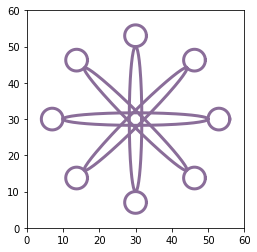

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import ellipe

ax = plt.axes(label='xxx')
ax.set_aspect('equal')

plt.axis([0, 60, 0, 60])

theta = np.linspace(0, 2*np.pi, 129)

x1 = 30 + 3 * np.cos(theta)
y1 = 7 + 3 * np.sin(theta)
plt.plot(x1, y1, color="#8A6D99", lw=3)

x2 = 30 + 3 * np.cos(theta)
y2 = 53 + 3 * np.sin(theta)
plt.plot(x2, y2, color="#8A6D99", lw=3)

x3 = 7 + 3 * np.cos(theta)
y3 = 30 + 3 * np.sin(theta)
plt.plot(x3, y3, color="#8A6D99", lw=3)

x4 = 53 + 3 * np.cos(theta)
y4 = 30 + 3 * np.sin(theta)
plt.plot(x4, y4, color="#8A6D99", lw=3)

x5 = 13.7365440327094 + 3 * np.cos(theta)
y5 = 13.7365440327094 + 3 * np.sin(theta)
plt.plot(x5, y5, color="#8A6D99", lw=3)

x6 = 46.2634559693265 + 3 * np.cos(theta)
y6 = 46.2634559693265 + 3 * np.sin(theta)
plt.plot(x6, y6, color="#8A6D99", lw=3)

x7 = 13.7365440327094 + 3 * np.cos(theta)
y7 = 46.2634559693265 + 3 * np.sin(theta)
plt.plot(x7, y7, color="#8A6D99", lw=3)

x8 = 46.2634559693265 + 3 * np.cos(theta)
y8 = 13.7365440327094 + 3 * np.sin(theta)
plt.plot(x8, y8, color="#8A6D99", lw=3)

oval1 = Ellipse(20, np.sqrt(3), center=(30, 30))
oval1.draw(plt)

oval2 = Ellipse(np.sqrt(3), 20, center=(30, 30))
oval2.draw(plt)

oval3 = Ellipse(20, np.sqrt(3), center=(30, 30))
oval3.rotate(np.pi/4, (30, 30))
oval3.draw(plt)

oval4 = Ellipse(np.sqrt(3), 20, center=(30, 30))
oval4.rotate(np.pi/4, (30, 30))
oval4.draw(plt)

plt.show()

#plt.savefig("plot.png", dpi=100, bbox_inches='tight')